[-6.03625077e-06  3.67207618e-06 -5.88593985e-03  7.60472265e-06
  1.77829236e-05  1.95902060e-02  1.03287889e-02 -3.42052273e-02
  9.99152089e-01]
test_AF
[ 0.03342239  0.0304095  -0.02878272  0.05143261 -0.06924745  0.00817327
 -0.00440627  0.00461007 -0.00588817 -0.0091947 ]
[ 0.28708536 -0.95789422 -0.00454503]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-0.32263499 -0.42506823 -0.29969494  1.        ]
 [-0.24221275 -0.85046083 -0.29969888  1.        ]
 [-0.19227405 -0.89536782 -0.29969935  1.        ]
 [-0.25412745 -0.71297012 -0.29969548  1.        ]
 [-0.28254524 -0.62850791 -0.29969461  1.        ]
 [-0.02532093 -0.0085418  -0.29970405  1.        ]
 [-0.04560339 -0.01276319 -0.29970384  1.        ]
 [-0.27110346 -0.19533168 -0.29969835  1.        ]
 [-0.34431692 -0.38187533 -0.29969628  1.        ]
 [-0.1642371  -0.08316173 -0.29970087  1.        ]]
[-0.32263499 -0.42506823 -0.29969494  1.        ]
[-0.24221275 -0.85046083 -0.29969888  1.        ]
[-0.19227405 -0.89536782 -

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


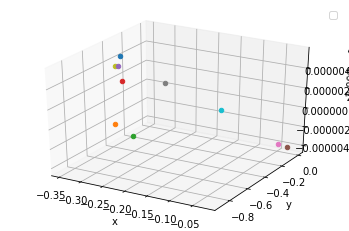

In [2]:
#https://www.google.com/search?rlz=1C1CHBD_enSG862SG863&sxsrf=ALeKk01-58Dx9ph8rNFReMmlgeqOXbXnpg%3A1584170013821&ei=HYRsXoPaMf_7z7sPyeqyuAU&q=iphone+7+camera+pixel+size&oq=iphone+7+camera+pixel+&gs_l=psy-ab.1.1.35i39j0l3j0i22i30l6.82510.85463..87152...0.1..0.109.257.2j1......0....1j2..gws-wiz.......0i71j0i67j0i273j0i7i30.JNyOWCbYQ6k
#https://stackoverflow.com/questions/23943602/essential-matrix-from-fundamental-matrix-%20in-opencv
#iphone 7 camera focal length: 28mm
#1.22 µm


import pandas as pd
from numpy import linalg as LA
import numpy as np
#pd.read_csv?
co_data = pd.read_csv('F:/3D/Reconstruction/project 1 - recon/data.csv', sep =",")

#P297
co_data['x2x1'] = co_data['x2'] * co_data['x1']
co_data['x2y1'] = co_data['x2'] * co_data['y1']

co_data['y2x1'] = co_data['y2'] * co_data['x1']
co_data['y2y1'] = co_data['y2'] * co_data['y1']


data_cleaned = pd.DataFrame()
data_cleaned['x2x1'] = co_data['x2x1']
data_cleaned['x2y1'] = co_data['x2y1']
data_cleaned['x2'] = co_data['x2']
data_cleaned['y2x1'] = co_data['y2x1']
data_cleaned['y2y1'] = co_data['y2y1']
data_cleaned['y2'] = co_data['y2']
data_cleaned['x1'] = co_data['x1']
data_cleaned['y1'] = co_data['y1']
data_cleaned['1'] = 1
data_cleaned
A = data_cleaned.to_numpy()

ATA = A.T.dot(A)

w, V = LA.eig(ATA)
#print(V)
f = V[:, -1]
print(f)

test_AF = A.dot(f.T)
print("test_AF")
print(test_AF)


f_factor = f[0] + f[2] + f[4] + f[6] + f[8] - f[1] - f[3] - f[5] - f[7] 
f_factor

F = np.reshape(f, (3,3))
F


point_1 = pd.DataFrame()
point_2 = pd.DataFrame()
point_1 = co_data[['x1','y1','z1']]
point_2 = co_data[['x2','y2','z2']]
point_1

point_1_matrix = point_1.to_numpy()
point_2_matrix = point_2.to_numpy()
L2 = F.dot(point_1_matrix.T)
L2 
#point_1_matrix

BTB = L2.dot(L2.T)
L2_w, L2_V = LA.eig(BTB)
#print(L2_V)
e2 = L2_V[:, -1]

print(e2)

P1 = np.array( [[1,0,0,0],[0,1,0,0],[0,0,1,0]])
P2 = np.array([[0.0] * 4] * 3)
e2_x = np.array([[0.0] * 3] * 3)
print(P2)

e2_x[0,1] = -1 * e2[2]
e2_x[0,2] = e2[1]
e2_x[1,0] = e2[2]
e2_x[1,2] = -1 * e2[0]
e2_x[2,0] = -1 * e2[1]
e2_x[2,1] = e2[0]
P2
P2_e2_x = e2_x * F
for i in range(0,3):
    for j in range(0,3):
        P2[i][j] = P2_e2_x[i][j]

P2[0,3] = e2[0]
P2[1,3] = e2[1]
P2[2,3] = e2[2]
P2

C = np.array([[0.0] * 4] * 4)
X = np.array([[0.0] * 4] * 10)
for i in range (0,10):
    x1 = co_data['x1'].to_numpy()[i]
    y1 = co_data['y1'].to_numpy()[i]
    x2 = co_data['x2'].to_numpy()[i]
    y2 = co_data['y2'].to_numpy()[i]
    C[0] = x1 * P1[2] - P1[0]
    C[1] = y1 * P1[2] - P1[1]
    C[2] = x2 * P1[2] - P2[0]
    C[3] = y1 * P1[2] - P2[1]
    CCT = C.dot(C.T)
    C_w, C_V = LA.eig(CCT)
    #print(L2_V)
    X[i] = C_V[:, -1]
    X[i] = X[i] / X[i][3]
print(X)

print(X[:][0])
print(X[:][1])
print(X[:][2])

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.legend('a','b')
for i in range(0,10):
    ax.scatter(X[i][0], X[i][1], X[i][2], marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

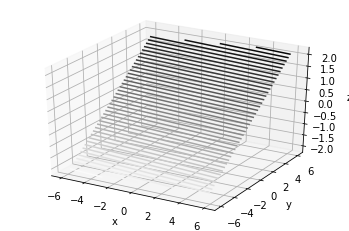

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return (x * 0.2 + y * 2)/6

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [ ]:
np.reshape?


[[2.29508197e+04 0.00000000e+00 2.01600000e+03]
 [0.00000000e+00 2.29508197e+04 1.51200000e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
E:
[[ 1.15891218e+02 -8.78253088e+02  1.80953707e+01]
 [ 9.69170055e+02 -2.84411892e+01  2.09807249e+01]
 [-2.37826538e+01 -1.25735837e+01 -2.42618210e-01]]


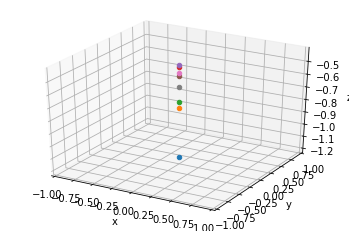

In [42]:
#https://www.google.com/search?rlz=1C1CHBD_enSG862SG863&sxsrf=ALeKk01-58Dx9ph8rNFReMmlgeqOXbXnpg%3A1584170013821&ei=HYRsXoPaMf_7z7sPyeqyuAU&q=iphone+7+camera+pixel+size&oq=iphone+7+camera+pixel+&gs_l=psy-ab.1.1.35i39j0l3j0i22i30l6.82510.85463..87152...0.1..0.109.257.2j1......0....1j2..gws-wiz.......0i71j0i67j0i273j0i7i30.JNyOWCbYQ6k
#https://stackoverflow.com/questions/23943602/essential-matrix-from-fundamental-matrix-%20in-opencv
#iphone 7 camera focal length: 28mm
#1.22 µm



import pandas as pd
from numpy import linalg as LA
import numpy as np
#pd.read_csv?

f = 28*1000/1.22
pic_x = 4032/2
pic_y = 3024/2


Camera_Matrix = np.array( [[f,0,pic_x],[0,f,pic_y],[0,0,1]])
print(Camera_Matrix)

co_data = pd.read_csv('C:/Users/Magic/Play_Ground/3D_Reconstructioin/data.csv', sep =",")

#P297
co_data['x2x1'] = co_data['x2'] * co_data['x1']
co_data['x2y1'] = co_data['x2'] * co_data['y1']

co_data['y2x1'] = co_data['y2'] * co_data['x1']
co_data['y2y1'] = co_data['y2'] * co_data['y1']


data_cleaned = pd.DataFrame()
data_cleaned['x2x1'] = co_data['x2x1']
data_cleaned['x2y1'] = co_data['x2y1']
data_cleaned['x2'] = co_data['x2']
data_cleaned['y2x1'] = co_data['y2x1']
data_cleaned['y2y1'] = co_data['y2y1']
data_cleaned['y2'] = co_data['y2']
data_cleaned['x1'] = co_data['x1']
data_cleaned['y1'] = co_data['y1']
data_cleaned['1'] = 1
data_cleaned
A = data_cleaned.to_numpy()

ATA = A.T.dot(A)

w, V = LA.eig(ATA)
#print(V)
f = V[:, -1]
#print(f)

test_AF = A.dot(f.T)
#print("test_AF")
#print(test_AF)


f_factor = f[0] + f[2] + f[4] + f[6] + f[8] - f[1] - f[3] - f[5] - f[7] 
f_factor

F = np.reshape(f, (3,3))
F


E = Camera_Matrix.T.dot(F).dot(Camera_Matrix)
print("E:")
print(E)

point_1 = pd.DataFrame()
point_2 = pd.DataFrame()
point_1 = co_data[['x1','y1','z1']]
point_2 = co_data[['x2','y2','z2']]
point_1

point_1_matrix = point_1.to_numpy()
point_2_matrix = point_2.to_numpy()
L2 = F.dot(point_1_matrix.T)
L2 
#point_1_matrix

BTB = L2.dot(L2.T)
L2_w, L2_V = LA.eig(BTB)
#print(L2_V)
e2 = L2_V[:, -1]

#print(e2)

P1 = np.array( [[1,0,0,0],[0,1,0,0],[0,0,1,0]])

P1 = Camera_Matrix.dot(P1)

P2 = np.array([[0.0] * 4] * 3)
e2_x = np.array([[0.0] * 3] * 3)
#print(P2)

e2_x[0,1] = -1 * e2[2]
e2_x[0,2] = e2[1]
e2_x[1,0] = e2[2]
e2_x[1,2] = -1 * e2[0]
e2_x[2,0] = -1 * e2[1]
e2_x[2,1] = e2[0]
P2
P2_e2_x = e2_x * F
for i in range(0,3):
    for j in range(0,3):
        P2[i][j] = P2_e2_x[i][j]

P2[0,3] = e2[0]
P2[1,3] = e2[1]
P2[2,3] = e2[2]
P2

#P2 = Camera_Matrix.dot(P2)

C = np.array([[0.0] * 4] * 4)
X = np.array([[0.0] * 4] * 8)
for i in range (0,8):
    x1 = co_data['x1'].to_numpy()[i]
    y1 = co_data['y1'].to_numpy()[i]
    x2 = co_data['x2'].to_numpy()[i]
    y2 = co_data['y2'].to_numpy()[i]
    C[0] = x1 * P1[2] - P1[0]
    C[1] = y1 * P1[2] - P1[1]
    C[2] = x2 * P1[2] - P2[0]
    C[3] = y1 * P1[2] - P2[1]
    CCT = C.dot(C.T)
    C_w, C_V = LA.eig(CCT)
    #print(L2_V)
    X[i] = C_V[:, -1]
    X[i] = X[i] / X[i][3]
#print(X)

#print(X[:][0])
#print(X[:][1])
#print(X[:][2])

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

for i in range(0,8):
    ax.scatter(X[i][0], X[i][1], X[i][2], marker='o')
#plt.legend(handles=legend_list)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()